<a href="https://colab.research.google.com/github/donggale72/10000.html/blob/main/ch01_08_%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%84%B7%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.08 이미지넷 모델구현 - AlexNet
---

* 날짜:
* 이름:

## 학습내용
    - AlexNet 모델 특징에 대해 이해한다.
    - AlexNet 모델을 텐서플로우를 이용해 구현한다. 


## 소개
---

In [ ]:
# LeNet-5 와 비슷하게 convolutional 층과 full-connected 층으로 나뉜다.
# Overlapping pooling 을 사용함(3 layers)(stride 를 좁히는 방법)
# Local-Response-Normalization(LRN) 사용
# 활성화 함수로 ReLU를 사용
# Dropout 을 사용함 (fully-connected 층에서)

## 구현
---

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, utils, models, applications, callbacks
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D, AvgPool2D
from keras.layers import BatchNormalization

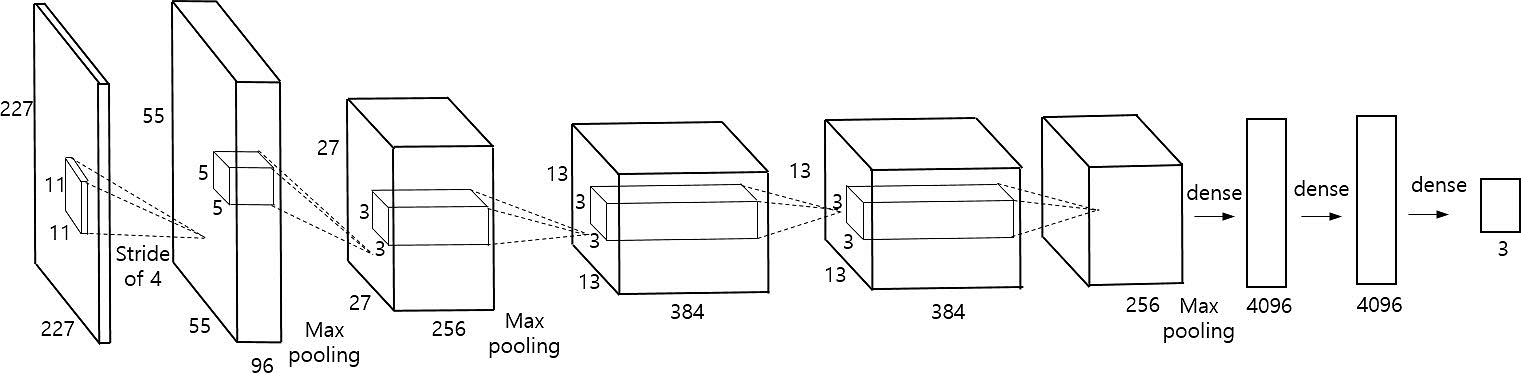

In [ ]:
def build_AlexNet():
  x = layers.Input(shape=(224, 224, 3))

  # convolutional 층
  y = layers.Conv2D(filters = 96, kernel_size = 11, strides = 4, activation = 'relu')(x) # 출력 : (55, 55, 96)
  y = layers.MaxPool2D(pool_size = 3, strides = 2)(y) # 출력 : (27, 27, 96)
  y = BatchNormalization(name = 'LRN1')(y)

  y = layers.Conv2D(filters = 256, kernel_size = 5, strides = 1, padding = 'same', activation = 'relu')(y) # 출력 : (27, 27, 256)
  y = layers.MaxPool2D(pool_size = 3, strides = 2)(y) # 출력 : (13, 13, 256)
  y = BatchNormalization(name = 'LRN2')(y)

  y = layers.Conv2D(filters = 384, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(y) # 출력 : (13, 13, 384)

  y = layers.Conv2D(filters = 384, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(y) # 출력 : (13, 13, 384)

  y = layers.Conv2D(filters = 256, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(y) # 출력 : (13, 13, 256)

  y = layers.MaxPool2D(pool_size = 3, strides = 2)(y) # 출력 : (6, 6, 256)
  

  # full connect 층
  y = layers.Flatten()(y) # 출력 (9216, )
  y = layers.Dense(4096, activation = 'relu')(y) # 출력 (4096, )
  y = layers.Dropout(0.5)(y)
  y = layers.Dense(4096, activation = 'relu')(y) # 출력 (4096, )
  y = layers.Dropout(0.5)(y)
  y = layers.Dense(1000, activation = 'softmax')(y) # 출력 (1000, )

  return models.Model(x, y)


In [ ]:
model = build_AlexNet()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 LRN1 (BatchNormalization)   (None, 26, 26, 96)        384       
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                         